## 호흡기질환 사망자수 모델링

- 데이터 : datasets.get_rdataset("deaths", package="MASS")

In [2]:
import pandas as pd
from statsmodels import datasets
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [4]:
raw_set = datasets.get_rdataset("deaths", package = "MASS")
raw_set.data

,time,value
0,1974.000000,3035
1,1974.083333,2552
2,1974.166667,2704
3,1974.250000,2554
4,1974.333333,2014
...,...,...
67,1979.583333,1354
68,1979.666667,1333
69,1979.750000,1492
70,1979.833333,1781


In [5]:
raw = raw_set.data

In [8]:
raw.time = pd.date_range('1974-01-01', periods = len(raw), freq = 'M')
raw

,time,value
0,1974-01-31,3035
1,1974-02-28,2552
2,1974-03-31,2704
3,1974-04-30,2554
4,1974-05-31,2014
...,...,...
67,1979-08-31,1354
68,1979-09-30,1333
69,1979-10-31,1492
70,1979-11-30,1781


In [9]:
raw['month'] = raw.time.dt.month
raw

,time,value,month
0,1974-01-31,3035,1
1,1974-02-28,2552,2
2,1974-03-31,2704,3
3,1974-04-30,2554,4
4,1974-05-31,2014,5
...,...,...,...
67,1979-08-31,1354,8
68,1979-09-30,1333,9
69,1979-10-31,1492,10
70,1979-11-30,1781,11


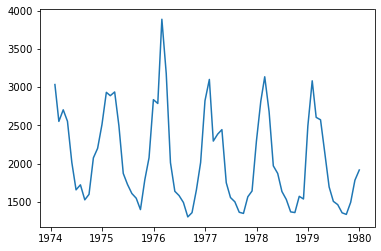

In [10]:
plt.plot(raw.time, raw.value)
plt.show()

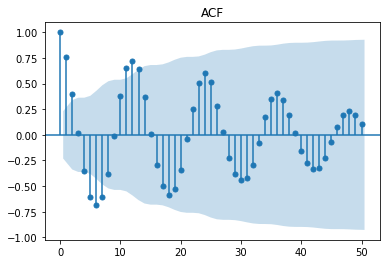

In [11]:
sm.graphics.tsa.plot_acf(raw.value, lags = 50, use_vlines = True, title = "ACF")
plt.show()

In [12]:
result = sm.OLS.from_formula(formula = 'value ~ C(month) - 1', data = raw).fit()
result.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
==================================================================
Model:              OLS              Adj. R-squared:     0.826    
Dependent Variable: value            AIC:                1012.7642
Date:               2021-07-23 12:02 BIC:                1040.0842
No. Observations:   72               Log-Likelihood:     -494.38  
Df Model:           11               F-statistic:        31.66    
Df Residuals:       60               Prob (F-statistic): 6.55e-21 
R-squared:          0.853            Scale:              64685.   
------------------------------------------------------------------
               Coef.   Std.Err.    t    P>|t|    [0.025    0.975] 
------------------------------------------------------------------
C(month)[1]  2959.3333 103.8306 28.5016 0.0000 2751.6413 3167.0254
C(month)[2]  2894.6667 103.8306 27.8788 0.0000 2686.9746 3102.3587
C(month)[3]  2743.0000 103.8306 26.4180 0.0000 2535.3079 2950.6921
C(month)[4]  2269.6667 103.8306 21.8593 0.0000 2061.9746 2477.3587
C(month)[5]  1805.1667 103.8306 17.3857 0.0000 1597.4746 2012.8587
C(month)[6]  1608.6667 103.8306 15.4932 0.0000 1400.9746 1816.3587
C(month)[7]  1550.8333 103.8306 14.9362 0.0000 1343.1413 1758.5254
C(month)[8]  1408.3333 103.8306 13.5638 0.0000 1200.6413 1616.0254
C(month)[9]  1397.3333 103.8306 13.4578 0.0000 1189.6413 1605.0254
C(month)[10] 1690.0000 103.8306 16.2765 0.0000 1482.3079 1897.6921
C(month)[11] 1874.0000 103.8306 18.0486 0.0000 1666.3079 2081.6921
C(month)[12] 2478.5000 103.8306 23.8706 0.0000 2270.8079 2686.1921
------------------------------------------------------------------
Omnibus:               19.630       Durbin-Watson:          1.374 
Prob(Omnibus):         0.000        Jarque-Bera (JB):       49.630
Skew:                  0.787        Prob(JB):               0.000 
Kurtosis:              6.750        Condition No.:          1     
==================================================================

"""

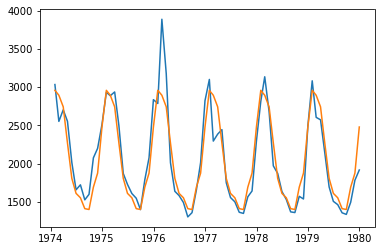

In [13]:
plt.plot(raw.time, raw.value, raw.time, result.fittedvalues)
plt.show() # 파란색 : 실제값, 노란색 : 예측값

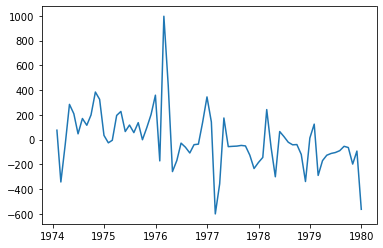

In [14]:
plt.plot(raw.time, result.resid)
plt.show() # 잔차 확인(계절성이 없어 보임)

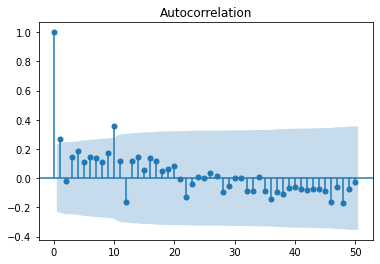

In [16]:
sm.graphics.tsa.plot_acf(result.resid, lags = 50, use_vlines = True)
plt.show()

In [56]:
raw.value.diff(12)[:13]

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
5       NaN
6       NaN
7       NaN
8       NaN
9       NaN
10      NaN
11      NaN
12   -102.0
Name: value, dtype: float64

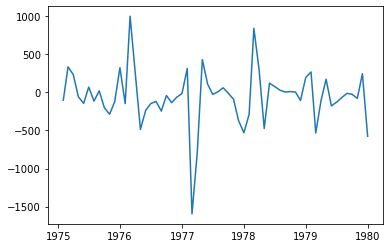

In [21]:
plt.plot(raw.time[12:], raw.value.diff(12).dropna())
plt.show()

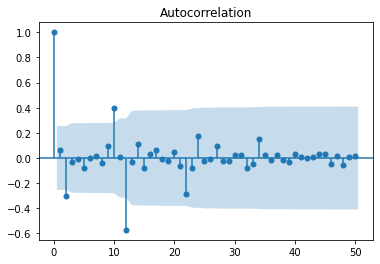

In [22]:
sm.graphics.tsa.plot_acf(raw.value.diff(12).dropna(), lags = 50, use_vlines = True)
plt.show()

### ARMA 모델링

In [23]:
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

In [24]:
import statsmodels
import numpy as np

In [25]:
raw.head()

,time,value,month
0,1974-01-31,3035,1
1,1974-02-28,2552,2
2,1974-03-31,2704,3
3,1974-04-30,2554,4
4,1974-05-31,2014,5


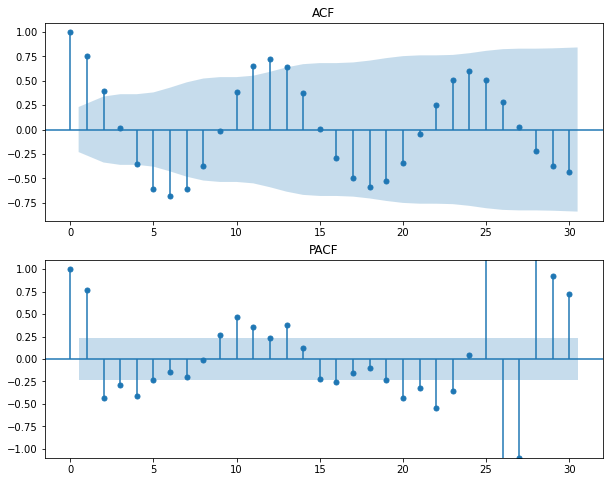

In [27]:
plt.figure(figsize = (10, 8))
sm.graphics.tsa.plot_acf(raw.value, lags = 30, ax = plt.subplot(211), title = 'ACF')
sm.graphics.tsa.plot_pacf(raw.value, lags = 30, ax = plt.subplot(212), title = 'PACF')
plt.ylim(-1.1, 1.1)
plt.show()

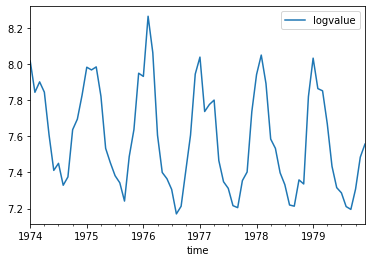

In [28]:
raw["logvalue"] = np.log(raw.value)
raw.plot(x = 'time', y = 'logvalue')
plt.show()

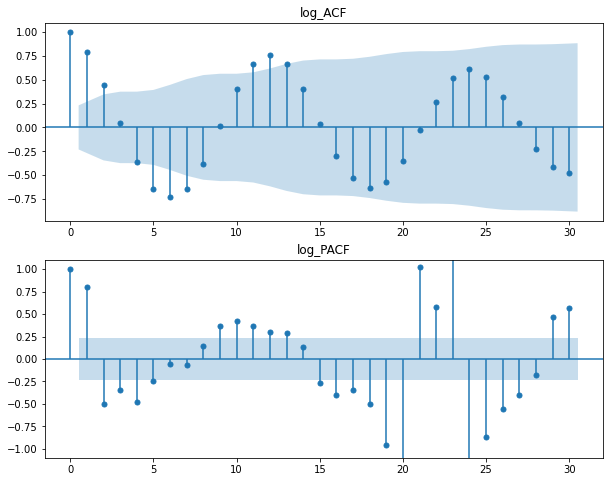

In [29]:
plt.figure(figsize = (10, 8))
sm.graphics.tsa.plot_acf(raw.logvalue, lags = 30, ax = plt.subplot(211), title = 'log_ACF')
sm.graphics.tsa.plot_pacf(raw.logvalue, lags = 30, ax = plt.subplot(212), title = 'log_PACF')
plt.ylim(-1.1, 1.1)
plt.show()

In [30]:
fit = statsmodels.tsa.arima_model.ARMA(raw.value, (1,1)).fit()
display(fit.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                  value   No. Observations:                   72
Model:                     ARMA(1, 1)   Log Likelihood                -526.068
Method:                       css-mle   S.D. of innovations            357.484
Date:                Fri, 23 Jul 2021   AIC                           1060.137
Time:                        12:15:39   BIC                           1069.244
Sample:                             0   HQIC                          1063.762
                                                                              
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const        2086.0310    161.985     12.878      0.000    1768.546    2403.516
ar.L1.value     0.6356      0.107      5.931      0.000       0.426       0.846
ma.L1.value     0.4376      0.120      3.655      0.000       0.203       0.672
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.5732           +0.0000j            1.5732            0.0000
MA.1           -2.2854           +0.0000j            2.2854            0.5000
-----------------------------------------------------------------------------
"""

In [31]:
fit.forecast(steps = 3) # 예측값 3개만 보기

(array([1970.06628792, 2012.31915135, 2039.17677851]),
 array([357.48360431, 524.38772745, 578.31835917]),
 array([[1269.41129841, 2670.72127743],
        [ 984.53809161, 3040.1002111 ],
        [ 905.69362294, 3172.65993408]]))

In [32]:
fit_log = statsmodels.tsa.arima_model.ARMA(raw.logvalue, (1,1)).fit()
display(fit_log.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:               logvalue   No. Observations:                   72
Model:                     ARMA(1, 1)   Log Likelihood                  31.983
Method:                       css-mle   S.D. of innovations              0.154
Date:                Fri, 23 Jul 2021   AIC                            -55.965
Time:                        12:17:04   BIC                            -46.859
Sample:                             0   HQIC                           -52.340
                                                                              
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              7.6037      0.080     94.470      0.000       7.446       7.761
ar.L1.logvalue     0.6796      0.098      6.970      0.000       0.489       0.871
ma.L1.logvalue     0.4680      0.111      4.214      0.000       0.250       0.686
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.4713           +0.0000j            1.4713            0.0000
MA.1           -2.1369           +0.0000j            2.1369            0.5000
-----------------------------------------------------------------------------
"""

In [33]:
fit_log.forecast(steps = 3) # 예측값 3개만 보기

(array([7.5720896 , 7.58220575, 7.58908117]),
 array([0.15366241, 0.23390208, 0.2628214 ]),
 array([[7.27091682, 7.87326239],
        [7.1237661 , 8.04064539],
        [7.0739607 , 8.10420164]]))

In [35]:
from itertools import product

result = []
for p, q in product(range(4), range(2)):
    model = statsmodels.tsa.arima_model.ARMA(raw.value, (p, q)).fit()
    result.append({"p": p, "q": q, "LLF": model.llf, "AIC": model.aic, "BIC": model.bic})
    
result = pd.DataFrame(result)

In [36]:
display(result)

,p,q,LLF,AIC,BIC
0,0,0,-563.410898,1130.821796,1135.375128
1,0,1,-536.952582,1079.905164,1086.735162
2,1,0,-531.583954,1069.167908,1075.997906
3,1,1,-526.068467,1060.136933,1069.243598
4,2,0,-523.657037,1055.314075,1064.420739
5,2,1,-516.137342,1042.274684,1053.658014
6,3,0,-521.836827,1053.673654,1065.056984
7,3,1,-515.726249,1043.452498,1057.112495


In [37]:
fit = statsmodels.tsa.arima_model.ARMA(raw.value, (2,1)).fit() # 최적의 p, q
display(fit.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                  value   No. Observations:                   72
Model:                     ARMA(2, 1)   Log Likelihood                -516.137
Method:                       css-mle   S.D. of innovations            309.351
Date:                Fri, 23 Jul 2021   AIC                           1042.275
Time:                        12:21:24   BIC                           1053.658
Sample:                             0   HQIC                          1046.806
                                                                              
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const        2065.9486     42.606     48.490      0.000    1982.443    2149.455
ar.L1.value     1.6097      0.067     24.172      0.000       1.479       1.740
ar.L2.value    -0.8503      0.061    -13.842      0.000      -0.971      -0.730
ma.L1.value    -0.7315      0.076     -9.639      0.000      -0.880      -0.583
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.9466           -0.5293j            1.0845           -0.0811
AR.2            0.9466           +0.5293j            1.0845            0.0811
MA.1            1.3670           +0.0000j            1.3670            0.0000
-----------------------------------------------------------------------------
"""

In [40]:
result_log = []
for p, q in product(range(4), range(2)):
    model = statsmodels.tsa.arima_model.ARMA(raw.logvalue, (p, q)).fit()
    result_log.append({"p": p, "q": q, "LLF": model.llf, "AIC": model.aic, "BIC": model.bic})
    
result_log = pd.DataFrame(result_log)

In [41]:
display(result_log)

,p,q,LLF,AIC,BIC
0,0,0,-11.258028,26.516056,31.069388
1,0,1,17.821620,-29.643240,-22.813242
2,1,0,24.894297,-43.788594,-36.958595
3,1,1,31.982602,-55.965203,-46.858539
4,2,0,35.739122,-63.478243,-54.371579
5,2,1,44.512880,-79.025760,-67.642430
6,3,0,38.560200,-67.120400,-55.737069
7,3,1,45.279957,-78.559913,-64.899917


In [42]:
fit_log = statsmodels.tsa.arima_model.ARMA(raw.logvalue, (2,1)).fit() # 최적의 p, q
display(fit_log.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:               logvalue   No. Observations:                   72
Model:                     ARMA(2, 1)   Log Likelihood                  44.513
Method:                       css-mle   S.D. of innovations              0.128
Date:                Fri, 23 Jul 2021   AIC                            -79.026
Time:                        12:23:44   BIC                            -67.642
Sample:                             0   HQIC                           -74.494
                                                                              
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              7.5920      0.020    384.992      0.000       7.553       7.631
ar.L1.logvalue     1.6407      0.059     27.830      0.000       1.525       1.756
ar.L2.logvalue    -0.8787      0.055    -16.027      0.000      -0.986      -0.771
ma.L1.logvalue    -0.7021      0.075     -9.363      0.000      -0.849      -0.555
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.9336           -0.5162j            1.0668           -0.0804
AR.2            0.9336           +0.5162j            1.0668            0.0804
MA.1            1.4243           +0.0000j            1.4243            0.0000
-----------------------------------------------------------------------------
"""

### ARIMA 모델링

In [43]:
import pandas as pd
from statsmodels import datasets
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [44]:
raw_set = datasets.get_rdataset("deaths", package = "MASS")
raw_set.data

,time,value
0,1974.000000,3035
1,1974.083333,2552
2,1974.166667,2704
3,1974.250000,2554
4,1974.333333,2014
...,...,...
67,1979.583333,1354
68,1979.666667,1333
69,1979.750000,1492
70,1979.833333,1781


In [45]:
raw = raw_set.data

In [46]:
raw.time = pd.date_range('1974-01-01', periods = len(raw), freq = 'M')
raw

,time,value
0,1974-01-31,3035
1,1974-02-28,2552
2,1974-03-31,2704
3,1974-04-30,2554
4,1974-05-31,2014
...,...,...
67,1979-08-31,1354
68,1979-09-30,1333
69,1979-10-31,1492
70,1979-11-30,1781


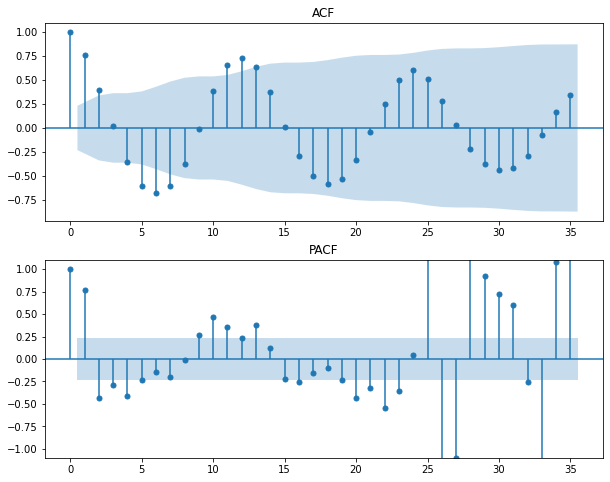

In [47]:
plt.figure(figsize = (10, 8))
sm.graphics.tsa.plot_acf(raw.value, lags = 35, ax = plt.subplot(211), title = 'ACF')
sm.graphics.tsa.plot_pacf(raw.value, lags = 35, ax = plt.subplot(212), title = 'PACF')
plt.ylim(-1.1, 1.1)
plt.show()

In [48]:
# ARIMA(1,1,0) 모델링
fit = sm.tsa.arima.ARIMA(raw.value, order = (1,1,0)).fit()
display(fit.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  value   No. Observations:                   72
Model:                 ARIMA(1, 1, 0)   Log Likelihood                -525.271
Date:                Fri, 23 Jul 2021   AIC                           1054.542
Time:                        12:28:41   BIC                           1059.068
Sample:                             0   HQIC                          1056.342
                                 - 72                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2689      0.096      2.788      0.005       0.080       0.458
sigma2      1.544e+05   2.16e+04      7.150      0.000    1.12e+05    1.97e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.08   Jarque-Bera (JB):                 2.46
Prob(Q):                              0.78   Prob(JB):                         0.29
Heteroskedasticity (H):               1.11   Skew:                            -0.06
Prob(H) (two-sided):                  0.80   Kurtosis:                         3.91
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

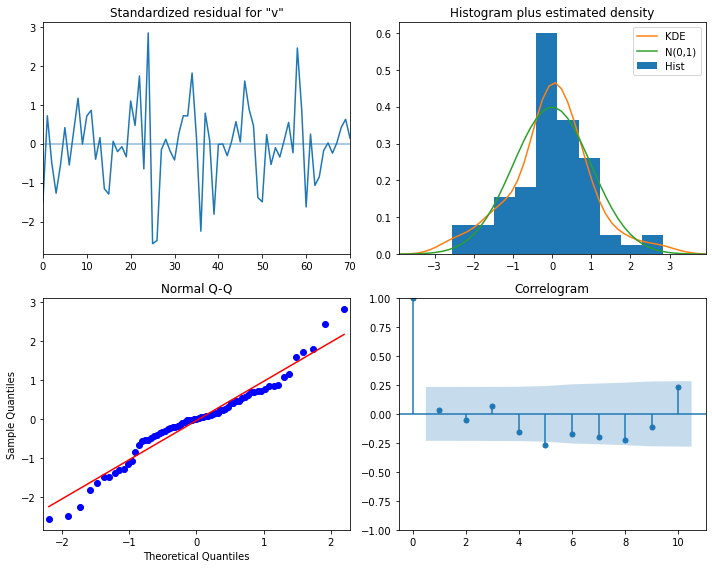

In [49]:
# 잔차 진단
fit.plot_diagnostics(figsize = (10, 8))
plt.tight_layout()
plt.show()

In [50]:
from itertools import product

result = []
for p, d, q in product(range(4), range(2), range(4)):
    model = sm.tsa.arima.ARIMA(raw.value, order = (p, d, q)).fit()
    result.append({"p": p, "d": d, "q": q, "LLF": model.llf, "AIC": model.aic, "BIC": model.bic})

In [51]:
# 모형 최적모수 선택
result = pd.DataFrame(result)
display(result)

,p,d,q,LLF,AIC,BIC
0,0,0,0,-563.410900,1130.821800,1135.375132
1,0,0,1,-536.955086,1079.910172,1086.740170
2,0,0,2,-529.265329,1066.530659,1075.637323
3,0,0,3,-526.157870,1062.315740,1073.699070
4,0,1,0,-527.962319,1057.924639,1060.187319
5,0,1,1,-525.107925,1054.215850,1058.741210
6,0,1,2,-525.102849,1056.205699,1062.993738
7,0,1,3,-523.440026,1054.880052,1063.930772
8,1,0,0,-531.600678,1069.201356,1076.031354
9,1,0,1,-526.083869,1060.167739,1069.274403


In [52]:
fit.forecast(steps = 3)

72    1951.031782
73    1960.720509
74    1963.325748
Name: predicted_mean, dtype: float64